<span style="font-size:40px; font-family:Arial;">Task-02: Creating K-means Clustering of Retail Store</span>

<span style="font-size:20px; font-family:Arial;">1. Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Print the version of each library
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"Scikit-learn: {KMeans.__module__.split('.')[0]} version: {KMeans.__module__.split('.')[1]}")

NumPy: 1.26.4
Pandas: 2.2.2
Matplotlib: 3.9.2
Seaborn: 0.13.2
Scikit-learn: sklearn version: cluster


<span style="font-size:20px; font-family:Arial;">2. Loading The Dataset</span>

In [2]:
# Loading the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<span style="font-size:20px; font-family:Arial;">3. Descriptive Statistics</span>

In [3]:
# Basic information about the dataset
data_info = {
    "Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum()
}

# Descriptive statistics for numerical columns
descriptive_stats = data.describe()

data_info, descriptive_stats

({'Shape': (200, 5),
  'Data Types': CustomerID                 int64
  Gender                    object
  Age                        int64
  Annual Income (k$)         int64
  Spending Score (1-100)     int64
  dtype: object,
  'Missing Values': CustomerID                0
  Gender                    0
  Age                       0
  Annual Income (k$)        0
  Spending Score (1-100)    0
  dtype: int64},
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
 count  200.000000  200.000000          200.000000              200.000000
 mean   100.500000   38.850000           60.560000               50.200000
 std     57.879185   13.969007           26.264721               25.823522
 min      1.000000   18.000000           15.000000                1.000000
 25%     50.750000   28.750000           41.500000               34.750000
 50%    100.500000   36.000000           61.500000               50.000000
 75%    150.250000   49.000000           78.000000             

<span style="font-size:20px; font-family:Arial;">4.1. Observations:</span></br>
<span style="font-size:15px; font-family:Arial;">Age: Wide range (18–70), with a mean of ~39.
Annual Income: Ranges from 15k to 137k, with an average of ~60k.
Spending Score: Distributed between 1 and 99, averaging around 50.</span></br></br>
<span style="font-size:20px; font-family:Arial;">
4.2. Distribution Analysis:</span>
<span style="font-size:15px; font-family:Arial;">
1. Age: Most customers are between 25 and 50 years old, with fewer in the extreme age ranges (18–25 and 55+).
2. Annual Income (k$): Income is fairly uniformly distributed with peaks around 40–80k.
3. Spending Score (1-100): A near-uniform distribution with some clustering around 40–70</span>

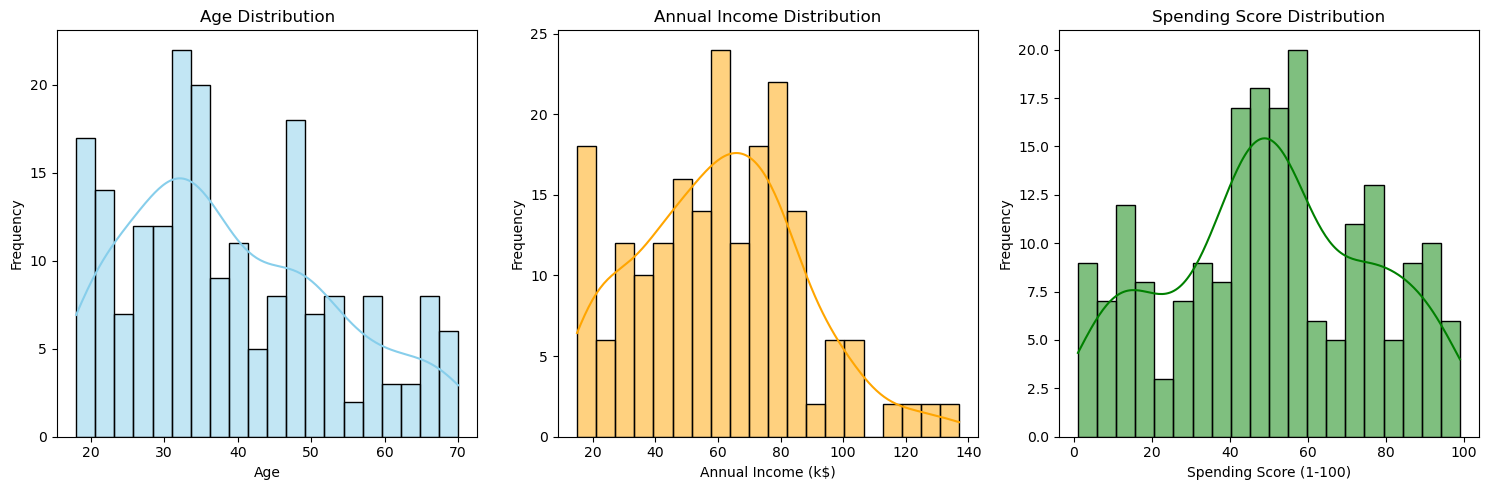

In [4]:
# Visualizing distributions of numerical features
plt.figure(figsize=(15, 5))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Annual Income Distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Spending Score Distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20, color='green')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<span style="font-size:20px; font-family:Arial;">5. Correlation Analysis:</span></br>
Age and Annual Income: Weak positive correlation (0.12).
Age and Spending Score: Weak negative correlation (-0.33), suggesting younger customers tend to have higher spending scores.
Annual Income and Spending Score: Negligible correlation (-0.01), indicating spending behavior is not directly tied to income levels.
Gender-Based Insights:
Spending Score:
Females have a slightly wider range of spending scores compared to males.
Both genders have similar median spending scores.
Annual Income:
Both genders show a similar distribution of income, with no significant differences in median income.

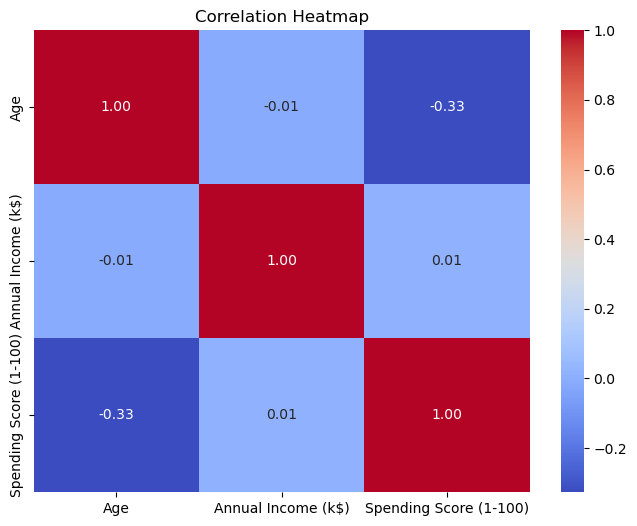

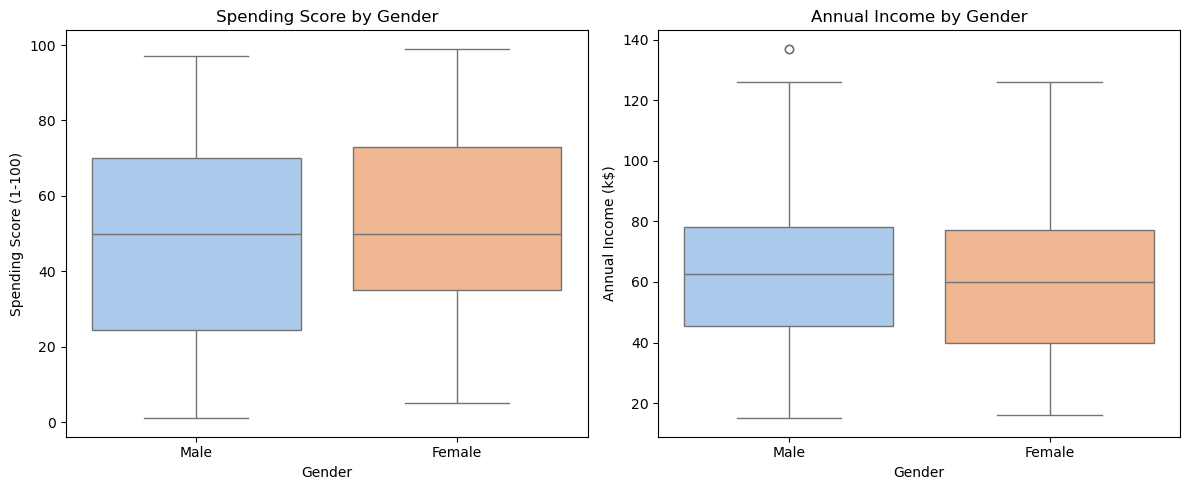

In [5]:
# Correlation heatmap of numerical features
plt.figure(figsize=(8, 6))
correlation = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Gender-based analysis of Spending Score and Annual Income
plt.figure(figsize=(12, 5))

# Boxplot for Spending Score by Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=data, palette='pastel')
plt.title('Spending Score by Gender')

# Boxplot for Annual Income by Gender
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=data, palette='pastel')
plt.title('Annual Income by Gender')

plt.tight_layout()
plt.show()

<span style="font-size:20px; font-family:Arial;">6. Check for missing values:</span></br>

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Selecting relevant features for clustering
# We exclude 'CustomerID' as it's not relevant and 'Gender' as it's categorical
selected_features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing the numerical features for optimal K-means performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Converting standardized features into a DataFrame for reference
scaled_features_df = pd.DataFrame(scaled_features, columns=selected_features.columns)

missing_values, scaled_features_df.describe()

(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64,
                 Age  Annual Income (k$)  Spending Score (1-100)
 count  2.000000e+02        2.000000e+02            2.000000e+02
 mean  -1.021405e-16       -2.131628e-16           -1.465494e-16
 std    1.002509e+00        1.002509e+00            1.002509e+00
 min   -1.496335e+00       -1.738999e+00           -1.910021e+00
 25%   -7.248436e-01       -7.275093e-01           -5.997931e-01
 50%   -2.045351e-01        3.587926e-02           -7.764312e-03
 75%    7.284319e-01        6.656748e-01            8.851316e-01
 max    2.235532e+00        2.917671e+00            1.894492e+00)

<span style="font-size:20px; font-family:Arial;">7. Elbow Method for clusters 𝐾:</span></br>

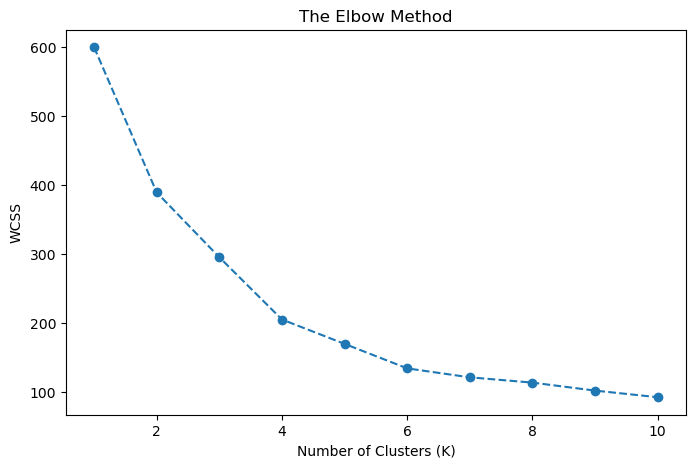

In [7]:
# Elbow Method to find the optimal K
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)  # Use the scaled data from preprocessing
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

<span style="font-size:20px; font-family:Arial;">8. Selecting 𝐾 as 4 for Clustering according to the graph of elbow Method:</span></br>

In [8]:
# Applying K-means with the optimal number of clusters (K=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Assigning cluster labels to each customer
data['Cluster'] = kmeans.labels_

# Displaying the first few rows with cluster labels
print(data.head())

# Optional: Analyze cluster centers
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),  # De-scale to original values
    columns=selected_features.columns
)
print("Cluster Centers (De-scaled):")
print(cluster_centers)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  
Cluster Centers (De-scaled):
         Age  Annual Income (k$)  Spending Score (1-100)
0  53.984615           47.707692               39.969231
1  32.875000           86.100000               81.525000
2  25.438596           40.000000               60.298246
3  39.368421           86.500000               19.578947


<span style="font-size:20px; font-family:Arial;">9. visualize the clusters in 2D space and 3D visualization:</span></br>

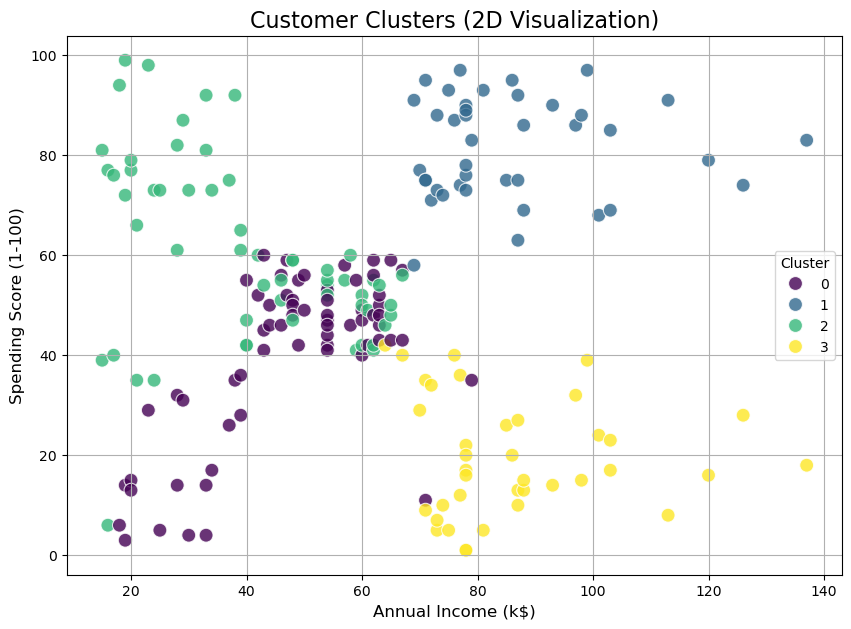

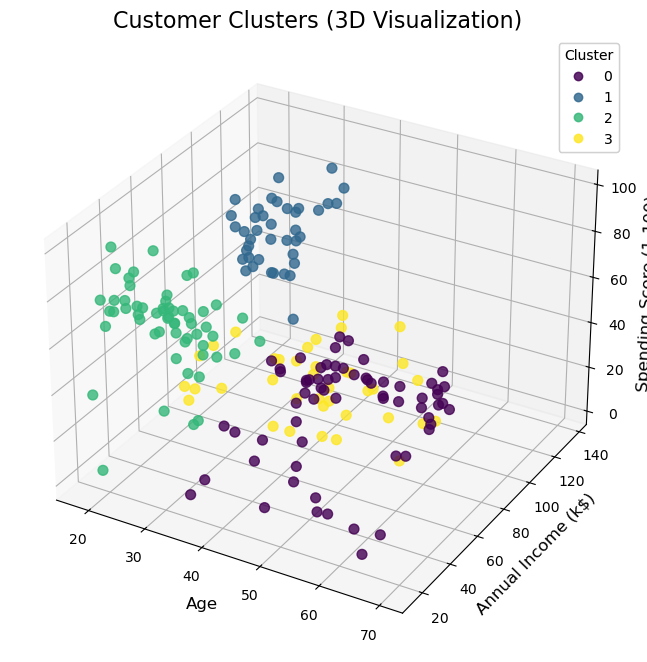

In [9]:
# 2D Visualization of clusters using "Annual Income" and "Spending Score"
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['Cluster'], 
    palette='viridis', 
    s=100, 
    alpha=0.8
)
plt.title('Customer Clusters (2D Visualization)', fontsize=16)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()

# Optional: 3D Visualization of clusters (if you prefer)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    data['Age'], 
    data['Annual Income (k$)'], 
    data['Spending Score (1-100)'], 
    c=data['Cluster'], 
    cmap='viridis', 
    s=50, 
    alpha=0.8
)

ax.set_title('Customer Clusters (3D Visualization)', fontsize=16)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Annual Income (k$)', fontsize=12)
ax.set_zlabel('Spending Score (1-100)', fontsize=12)

# Add legend for 3D plot
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster", loc="best")
ax.add_artist(legend1)

plt.show()

<span style="font-size:20px; font-family:Arial;">10. Group by Cluster:</span></br>
<span style="font-size:15px; font-family:Arial;"> The Cluster column groups the dataset to calculate average values for Age, Annual Income (k$), and Spending Score (1-100).
Cluster Sizes: Counts the number of customers in each cluster to better understand cluster distribution.
Summary per Cluster: Outputs the characteristics (average age, income, spending score, and size) of each cluster in an easy-to-read format.</span></br>

In [10]:
# Analyze cluster characteristics
cluster_analysis = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_sizes = data['Cluster'].value_counts()

print("Cluster-wise Averages:")
print(cluster_analysis)
print("\nCluster Sizes:")
print(cluster_sizes)

# Add cluster characteristics summary to the output
for cluster_id in range(4):  # Adjust if number of clusters changes
    print(f"\nCluster {cluster_id} Characteristics:")
    print(f" - Average Age: {cluster_analysis.loc[cluster_id, 'Age']:.2f}")
    print(f" - Average Annual Income: {cluster_analysis.loc[cluster_id, 'Annual Income (k$)']:.2f}")
    print(f" - Average Spending Score: {cluster_analysis.loc[cluster_id, 'Spending Score (1-100)']:.2f}")
    print(f" - Number of Customers: {cluster_sizes[cluster_id]}")

Cluster-wise Averages:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947

Cluster Sizes:
Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64

Cluster 0 Characteristics:
 - Average Age: 53.98
 - Average Annual Income: 47.71
 - Average Spending Score: 39.97
 - Number of Customers: 65

Cluster 1 Characteristics:
 - Average Age: 32.88
 - Average Annual Income: 86.10
 - Average Spending Score: 81.53
 - Number of Customers: 40

Cluster 2 Characteristics:
 - Average Age: 25.44
 - Average Annual Income: 40.00
 - Average Spending Score: 60.30
 - Number of Customers: 57

Cluster 3 Characteristics:
 - Average Age: 39.37
 - Average Annual Income: 86.50
 - Averag

 <span style="font-size:20px; font-family:Arial;">11. Save and Export Results:</span></br>

In [11]:
# Save the dataset with cluster labels to a new CSV file
output_file_path = 'Mall_Customers_with_Clusters.csv'
data.to_csv(output_file_path, index=False)

print(f"Dataset with cluster labels saved successfully to: {output_file_path}")

Dataset with cluster labels saved successfully to: Mall_Customers_with_Clusters.csv
